Import libraries

In [1]:
from algorithm import *
from visualize import *
from classes.environment import Environment

import h5py
import os

# Used for seed in np.random
Reproduce = 2023

Baseline

In [2]:
k = 6
Qs = [1 + 0.5*i for i in range(7)]
env = Environment()

In [3]:
np.random.seed(Reproduce)
pi1, pi2, theta1, theta2, q1, q2 = simulate_episode(env, Qs, k)

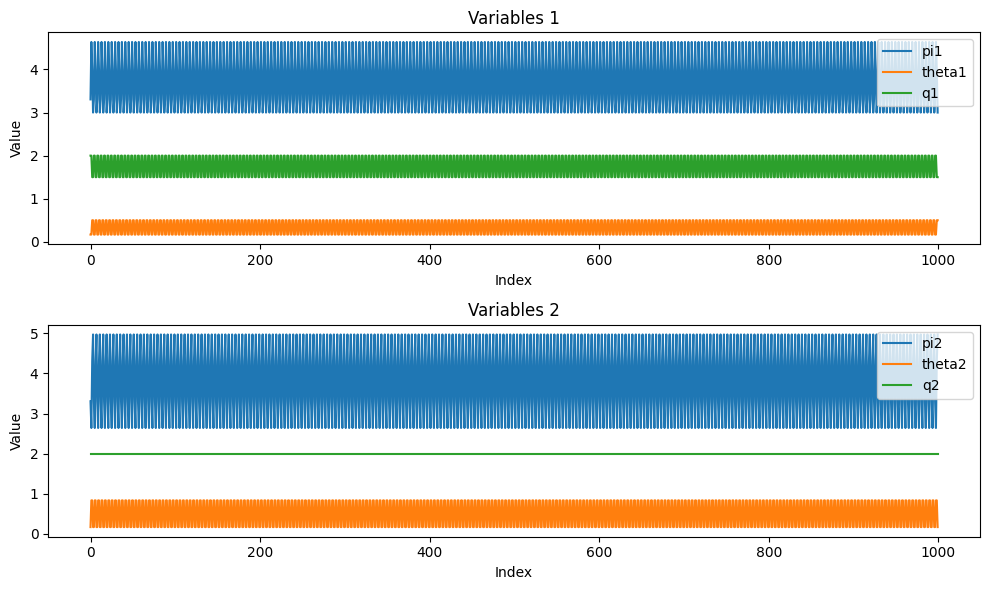

In [4]:
visualize_last_L(pi1, pi2, theta1, theta2, q1, q2)

In [6]:
for i in range(10):
    print(pi1[i], pi2[i], theta1[i], theta2[i], q1[i], q2[i])

3.3055555555555554 3.3055555555555554 0.16666666666666666 0.16666666666666666 2.0 2.0
4.638888888888889 2.638888888888889 0.16666666666666666 0.8333333333333334 2.0 2.0
4.0 4.305555555555555 0.5 0.8333333333333334 1.5 2.0
3.0 4.972222222222222 0.5 0.16666666666666666 1.5 2.0
3.3055555555555554 3.3055555555555554 0.16666666666666666 0.16666666666666666 2.0 2.0
4.638888888888889 2.638888888888889 0.16666666666666666 0.8333333333333334 2.0 2.0
4.0 4.305555555555555 0.5 0.8333333333333334 1.5 2.0
3.0 4.972222222222222 0.5 0.16666666666666666 1.5 2.0
3.3055555555555554 3.3055555555555554 0.16666666666666666 0.16666666666666666 2.0 2.0
4.638888888888889 2.638888888888889 0.16666666666666666 0.8333333333333334 2.0 2.0


Save data in a HDF5 file

In [7]:
current_dir = os.getcwd()
file_path = os.path.join(current_dir, '..', 'data', 'simulation_data.h5')
file = h5py.File(file_path, 'w')

In [8]:
# Create a group for the data
group = file.create_group('simulation')

# Store the lists as datasets within the group
group.create_dataset('pi1', data=np.array(pi1))
group.create_dataset('pi2', data=np.array(pi2))
group.create_dataset('theta1', data=np.array(theta1))
group.create_dataset('theta2', data=np.array(theta2))
group.create_dataset('q1', data=np.array(q1))
group.create_dataset('q2', data=np.array(q2))

# Close the HDF5 file
file.close()

In [10]:
# Open the HDF5 file in read mode
file = h5py.File(file_path, 'r')

# Access the dataset within the 'simulation' group
dataset = file['simulation/q1']

# Read the data into a numpy array
q1_data = dataset[:]

# Close the HDF5 file
file.close()